In [1]:
from hypers import Params

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

params = Params.read_hyperparameters("parameters.json")

{'num_epochs': 2000, 'batch_size': 128, 'alpha': 10, 'miss_rate': 0.2, 'hint_rate': 0.9, 'train_ratio': 0.8, 'lr_D': 0.001, 'lr_G': 0.001, 'num_runs': 50}


In [2]:
# Load the CSV files for Breast

dataset = "breast"
myFolder = "~/LeandroSobralThesis/breast/"
gainFolder = "~/LeandroSobralThesis/GAIN/breast/"

train_samples = [455, 409, 364, 318, 273, 227, 204, 182, 159, 136]
test_samples = 114  # breast size


gain_loss_D = {}
gain_loss_G = {}
gain_loss_MSE_test_testsplit = {}
gain_loss_MSE_train = {}
gain_loss_MSE_test = {}
gain_loss_MSE_train_testsplit = {}
gain_cpu = {}
gain_ram_percentage = {}
gain_ram = {}

gain_MSE_final = {}

gain_run_time = {}

for samples in train_samples:

    for i in range(params.num_runs):
        gain_loss_D[samples, i] = pd.read_csv(
            gainFolder
            + f"results/lossD_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )

        gain_loss_G[samples, i] = pd.read_csv(
            gainFolder
            + f"results/lossG_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )

        gain_loss_MSE_test_testsplit[samples, i] = np.array(
            pd.read_csv(
                gainFolder
                + f"results/lossMSE_test_testsplit_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
            )
        )

        gain_loss_MSE_train[samples, i] = pd.read_csv(
            gainFolder
            + f"results/lossMSE_train_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )

        gain_loss_MSE_test[samples, i] = pd.read_csv(
            gainFolder
            + f"results/lossMSE_test_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )

        gain_loss_MSE_train_testsplit[samples, i] = pd.read_csv(
            gainFolder
            + f"results/lossMSE_train_testsplit_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )

        gain_MSE_final[samples, i] = gain_loss_MSE_test_testsplit[samples, i][-1]

        gain_cpu[samples, i] = pd.read_csv(
            gainFolder + f"results/cpu_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )

        gain_ram_percentage[samples, i] = pd.read_csv(
            gainFolder
            + f"results/ram_percentage_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )

        gain_ram[samples, i] = pd.read_csv(
            gainFolder + f"results/ram_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )

    gain_run_time[samples] = np.array(
        pd.read_csv(
            gainFolder + f"results/run_time_{int(params.miss_rate * 100)}_{samples}.csv"
        )
    ).flatten()


my_loss_D = {}
my_loss_G = {}
my_loss_MSE_test_testsplit = {}
my_loss_MSE_train = {}
my_loss_MSE_test = {}
my_loss_MSE_train_testsplit = {}
my_cpu = {}
my_ram_percentage = {}
my_ram = {}

my_MSE_final = {}

my_run_time = {}

for samples in train_samples:

    for i in range(params.num_runs):
        my_loss_D[samples, i] = pd.read_csv(
            myFolder + f"results/lossD_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        my_loss_G[samples, i] = pd.read_csv(
            myFolder + f"results/lossG_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        my_loss_MSE_test_testsplit[samples, i] = np.array(
            pd.read_csv(
                myFolder
                + f"results/lossMSE_test_testsplit_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
            )
        )
        my_loss_MSE_train[samples, i] = pd.read_csv(
            myFolder
            + f"results/lossMSE_train_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        my_loss_MSE_test[samples, i] = pd.read_csv(
            myFolder
            + f"results/lossMSE_test_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        my_loss_MSE_train_testsplit[samples, i] = pd.read_csv(
            myFolder
            + f"results/lossMSE_train_testsplit_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        my_cpu[samples, i] = pd.read_csv(
            myFolder + f"results/cpu_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        my_ram_percentage[samples, i] = pd.read_csv(
            myFolder
            + f"results/ram_percentage_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        my_ram[samples, i] = pd.read_csv(
            myFolder + f"results/ram_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        my_MSE_final[samples, i] = my_loss_MSE_test_testsplit[samples, i][-1]

    my_run_time[samples] = np.array(
        pd.read_csv(
            myFolder + f"results/run_time_{int(params.miss_rate * 100)}_{samples}.csv"
        )
    ).flatten()

In [2]:
# Load the CSV files for Spam

dataset = "spam"
myFolder = "~/LeandroSobralThesis/" + dataset + "/"
gainFolder = "~/LeandroSobralThesis/" + dataset + "/"

train_samples = [
    3680,
    3312,
    2944,
    2576,
    2208,
    1840,
    1656,
    1472,
    1288,
    1104,
    920,
    736,
    552,
    368,
]
test_samples = 921

my_loss_D = {}
my_loss_G = {}
gain_loss_D = {}
gain_loss_G = {}
my_loss_MSE_test_testsplit = {}
gain_loss_MSE_all = {}
my_loss_MSE_train = {}
gain_loss_MSE_train = {}
my_loss_MSE_test = {}
gain_loss_MSE_test = {}
my_loss_MSE_train_testsplit = {}
gain_loss_MSE_testsplit = {}

my_MSE_final = {}
gain_MSE_final = {}

my_run_time = {}
gain_run_time = {}

for samples in train_samples:
    for i in range(params.num_runs):
        my_loss_D[samples, i] = pd.read_csv(
            myFolder + f"results/lossD_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )

    for i in range(params.num_runs):
        my_loss_G[samples, i] = pd.read_csv(
            myFolder + f"results/lossG_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )

    for i in range(params.num_runs):
        my_loss_MSE_test_testsplit[samples, i] = np.array(
            pd.read_csv(
                myFolder
                + f"results/lossMSE_all_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
            )
        )

    for i in range(params.num_runs):
        my_loss_MSE_train[samples, i] = pd.read_csv(
            myFolder
            + f"results/lossMSE_train_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )

    for i in range(params.num_runs):
        my_loss_MSE_test[samples, i] = pd.read_csv(
            myFolder
            + f"results/lossMSE_test_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )

    for i in range(params.num_runs):
        my_loss_MSE_train_testsplit[samples, i] = pd.read_csv(
            myFolder
            + f"results/lossMSE_testsplit_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
    for i in range(params.num_runs):
        my_MSE_final[samples, i] = my_loss_MSE_test_testsplit[samples, i][-1]

    my_run_time[samples] = np.array(
        pd.read_csv(
            myFolder + f"results/run_time_{int(params.miss_rate * 100)}_{samples}.csv"
        )
    ).flatten()

FileNotFoundError: [Errno 2] No such file or directory: '/home/leandrosobral/LeandroSobralThesis/spam/results/lossD_20_3680_15.csv'

In [3]:
# Load the CSV files for Credit

dataset = "credit"
myFolder = "~/LeandroSobralThesis/credit/"
gainFolder = "~/LeandroSobralThesis/GAIN/credit/"

train_samples = [
    24000,
    21600,
    19200,
    16800,
    14400,
    12000,
    10800,
    9600,
    8400,
    7200,
    6000,
    4800,
    3600,
    2400,
]
test_samples = 6000  # credit size


my_loss_D = {}
my_loss_G = {}
my_loss_MSE_test_testsplit = {}
my_loss_MSE_train = {}
my_loss_MSE_test = {}
my_loss_MSE_train_testsplit = {}
my_cpu = {}
my_ram_percentage = {}
my_ram = {}

my_MSE_final = {}

my_run_time = {}

for samples in train_samples:

    for i in range(params.num_runs):
        my_loss_D[samples, i] = pd.read_csv(
            myFolder + f"results/lossD_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )

        my_loss_G[samples, i] = pd.read_csv(
            myFolder + f"results/lossG_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )

        my_loss_MSE_test_testsplit[samples, i] = np.array(
            pd.read_csv(
                myFolder
                + f"results/lossMSE_test_testsplit_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
            )
        )
        my_loss_MSE_train[samples, i] = pd.read_csv(
            myFolder
            + f"results/lossMSE_train_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        my_loss_MSE_test[samples, i] = pd.read_csv(
            myFolder
            + f"results/lossMSE_test_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        my_loss_MSE_train_testsplit[samples, i] = pd.read_csv(
            myFolder
            + f"results/lossMSE_train_testsplit_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        my_cpu[samples, i] = pd.read_csv(
            myFolder + f"results/cpu_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        my_ram_percentage[samples, i] = pd.read_csv(
            myFolder
            + f"results/ram_percentage_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        my_ram[samples, i] = pd.read_csv(
            myFolder + f"results/ram_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        my_MSE_final[samples, i] = my_loss_MSE_test_testsplit[samples, i][-1]

    my_run_time[samples] = np.array(
        pd.read_csv(
            myFolder + f"results/run_time_{int(params.miss_rate * 100)}_{samples}.csv"
        )
    ).flatten()


##########################################################################################################################33
gain_loss_D = {}
gain_loss_G = {}
gain_loss_MSE_test_testsplit = {}
gain_loss_MSE_train = {}
gain_loss_MSE_test = {}
gain_loss_MSE_train_testsplit = {}
gain_cpu = {}
gain_ram_percentage = {}
gain_ram = {}

gain_MSE_final = {}

gain_run_time = {}

for samples in train_samples:

    for i in range(params.num_runs):
        gain_loss_D[samples, i] = pd.read_csv(
            gainFolder
            + f"results/lossD_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        gain_loss_G[samples, i] = pd.read_csv(
            gainFolder
            + f"results/lossG_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        gain_loss_MSE_test_testsplit[samples, i] = np.array(
            pd.read_csv(
                gainFolder
                + f"results/lossMSE_test_testsplit_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
            )
        )
        gain_loss_MSE_train[samples, i] = pd.read_csv(
            gainFolder
            + f"results/lossMSE_train_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        gain_loss_MSE_test[samples, i] = pd.read_csv(
            gainFolder
            + f"results/lossMSE_test_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        gain_loss_MSE_train_testsplit[samples, i] = pd.read_csv(
            gainFolder
            + f"results/lossMSE_train_testsplit_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        gain_cpu[samples, i] = pd.read_csv(
            gainFolder + f"results/cpu_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        gain_ram_percentage[samples, i] = pd.read_csv(
            gainFolder
            + f"results/ram_percentage_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        gain_ram[samples, i] = pd.read_csv(
            gainFolder + f"results/ram_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        gain_MSE_final[samples, i] = gain_loss_MSE_test_testsplit[samples, i][-1]

    gain_run_time[samples] = np.array(
        pd.read_csv(
            gainFolder + f"results/run_time_{int(params.miss_rate * 100)}_{samples}.csv"
        )
    ).flatten()

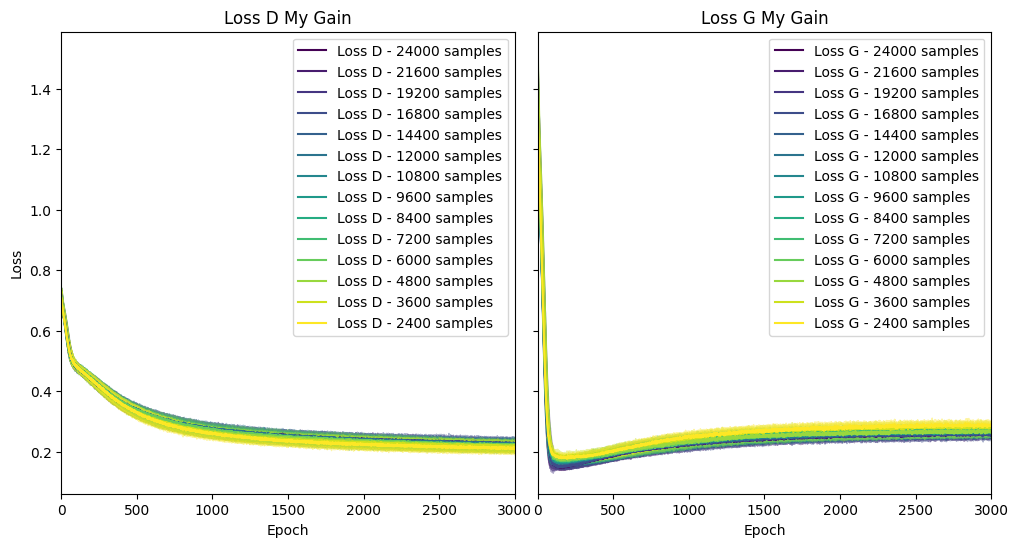

In [24]:
# Plot the D and G losses from My Gain

xmax = params.num_epochs

# Create a new figure for Loss D and Loss G
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Set the labels and limits for Loss D
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_xlim(0, xmax)
ax1.set_title(f"Loss D My Gain")

# Set the labels and limits for Loss G
ax2.set_xlabel("Epoch")
ax2.set_xlim(0, xmax)
ax2.set_title(f"Loss G My Gain")

# Create a color gradient based on the loop index
colors = np.linspace(0, 1, len(train_samples))

for i, samples in enumerate(train_samples):
    runs_D = {run: data for (s, run), data in my_loss_D.items() if s == samples}
    runs_D_array = np.array(list(runs_D.values()))
    mean_runs_D = np.mean(runs_D_array, axis=0)
    std_runs_D = np.std(runs_D_array, axis=0)

    # Use the color gradient for the plot
    ax1.plot(
        mean_runs_D, label=f"Loss D - {samples} samples", c=plt.cm.viridis(colors[i])
    )
    ax1.fill_between(
        np.arange(1, len(mean_runs_D) + 1, 1),
        mean_runs_D[:, 0] + std_runs_D[:, 0],
        mean_runs_D[:, 0] - std_runs_D[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )

    runs_G = {run: data for (s, run), data in my_loss_G.items() if s == samples}
    runs_G_array = np.array(list(runs_G.values()))
    mean_runs_G = np.mean(runs_G_array, axis=0)
    std_runs_G = np.std(runs_G_array, axis=0)

    ax2.plot(
        mean_runs_G, label=f"Loss G - {samples} samples", c=plt.cm.viridis(colors[i])
    )
    ax2.fill_between(
        np.arange(1, len(mean_runs_G) + 1, 1),
        mean_runs_G[:, 0] + std_runs_G[:, 0],
        mean_runs_G[:, 0] - std_runs_G[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )

# Add legend to both subplots
ax1.legend()
ax2.legend()

plt.subplots_adjust(wspace=0.05)

# Show the plot
plt.show()

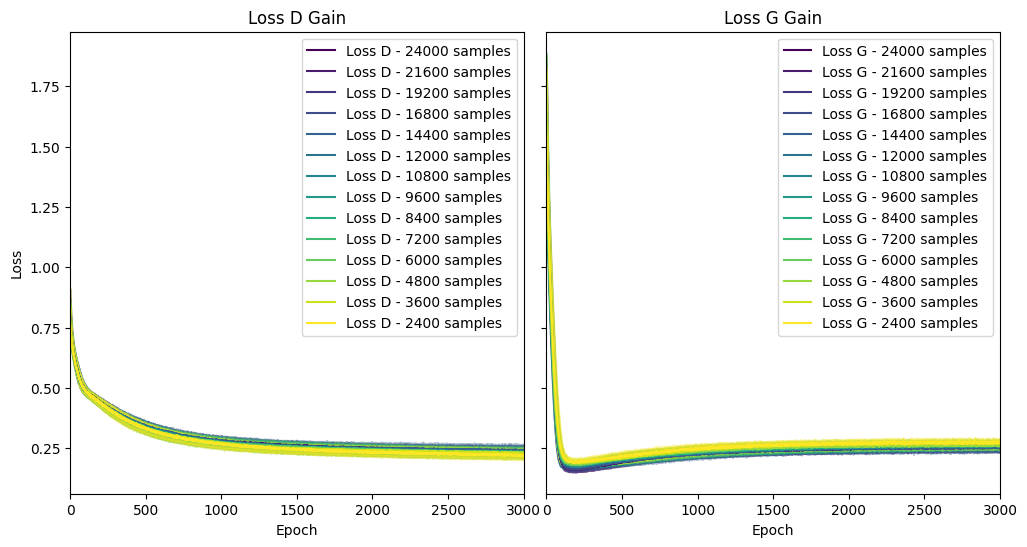

In [29]:
# Plot the D and G losses from Gain

xmax = params.num_epochs

# Create a new figure for Loss D and Loss G
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Set the labels and limits for Loss D
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_xlim(0, xmax)
ax1.set_title(f"Loss D Gain")

# Set the labels and limits for Loss G
ax2.set_xlabel("Epoch")
ax2.set_xlim(0, xmax)
ax2.set_title(f"Loss G Gain")

# Create a color gradient based on the loop index
colors = np.linspace(0, 1, len(train_samples))

for i, samples in enumerate(train_samples):
    runs_D = {run: data for (s, run), data in gain_loss_D.items() if s == samples}
    runs_D_array = np.array(list(runs_D.values()))
    mean_runs_D = np.mean(runs_D_array, axis=0)
    std_runs_D = np.std(runs_D_array, axis=0)

    # Use the color gradient for the plot
    ax1.plot(
        mean_runs_D, label=f"Loss D - {samples} samples", c=plt.cm.viridis(colors[i])
    )
    ax1.fill_between(
        np.arange(1, len(mean_runs_D) + 1, 1),
        mean_runs_D[:, 0] + std_runs_D[:, 0],
        mean_runs_D[:, 0] - std_runs_D[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )

    runs_G = {run: data for (s, run), data in gain_loss_G.items() if s == samples}
    runs_G_array = np.array(list(runs_G.values()))
    mean_runs_G = np.mean(runs_G_array, axis=0)
    std_runs_G = np.std(runs_G_array, axis=0)

    ax2.plot(
        mean_runs_G, label=f"Loss G - {samples} samples", c=plt.cm.viridis(colors[i])
    )
    ax2.fill_between(
        np.arange(1, len(mean_runs_G) + 1, 1),
        mean_runs_G[:, 0] + std_runs_G[:, 0],
        mean_runs_G[:, 0] - std_runs_G[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )

# Add legend to both subplots
ax1.legend()
ax2.legend()

plt.subplots_adjust(wspace=0.05)

# Show the plot
plt.show()

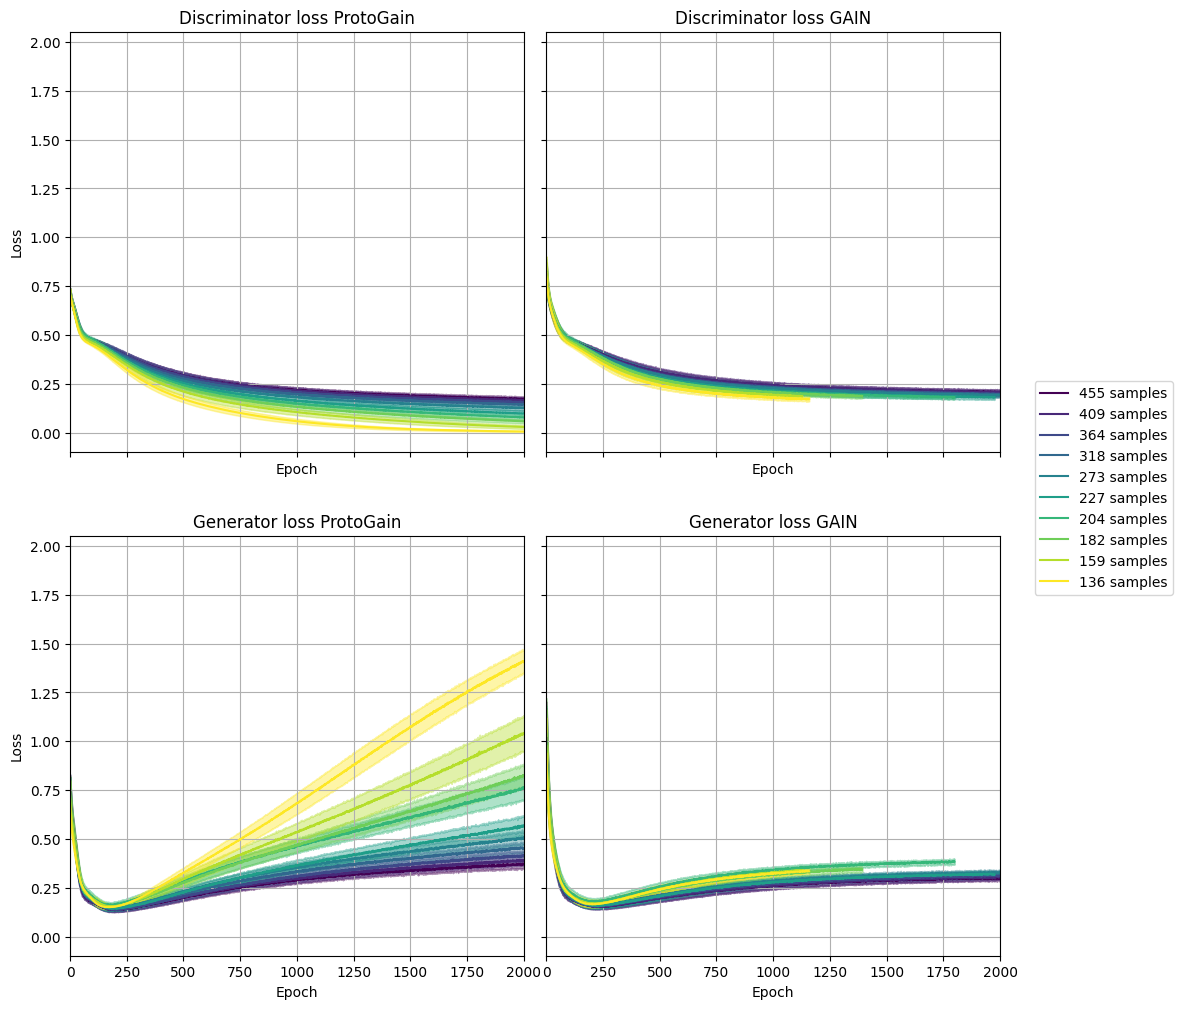

In [105]:
# Plot the D and G losses

xmax = params.num_epochs

fig, axs = plt.subplots(2, 2, figsize=(12, 12), sharex=True, sharey=True)

# Set the labels and limits for Loss D
axs[0, 0].set_xlabel("Epoch")
axs[0, 0].set_ylabel("Loss")
axs[0, 0].set_xlim(0, xmax)
axs[0, 0].set_title(f"Discriminator loss ProtoGain")

# Set the labels and limits for Loss G
axs[0, 1].set_xlabel("Epoch")
axs[0, 1].set_title(f"Discriminator loss GAIN")


axs[1, 0].set_xlabel("Epoch")
axs[1, 0].set_ylabel("Loss")
axs[1, 0].set_title(f"Generator loss ProtoGain")

axs[1, 1].set_xlabel("Epoch")
axs[1, 1].set_title(f"Generator loss GAIN")


# Create a color gradient based on the loop index
colors = np.linspace(0, 1, len(train_samples))

for i, samples in enumerate(train_samples):
    runs_D = {run: data for (s, run), data in my_loss_D.items() if s == samples}
    runs_D_array = np.array(list(runs_D.values()))
    mean_runs_D = np.mean(runs_D_array, axis=0)
    std_runs_D = np.std(runs_D_array, axis=0)

    # Use the color gradient for the plot
    axs[0, 0].plot(mean_runs_D, label=f"{samples} samples", c=plt.cm.viridis(colors[i]))
    axs[0, 0].fill_between(
        np.arange(1, len(mean_runs_D) + 1, 1),
        mean_runs_D[:, 0] + std_runs_D[:, 0],
        mean_runs_D[:, 0] - std_runs_D[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )
    axs[0, 0].xaxis.grid(True, which="major")
    axs[0, 0].yaxis.grid(True, which="major")

    runs_D = {run: data for (s, run), data in gain_loss_D.items() if s == samples}
    runs_D_array = np.array(list(runs_D.values()))
    mean_runs_D = np.mean(runs_D_array, axis=0)
    std_runs_D = np.std(runs_D_array, axis=0)

    # Use the color gradient for the plot
    axs[0, 1].plot(mean_runs_D, c=plt.cm.viridis(colors[i]))
    axs[0, 1].fill_between(
        np.arange(1, len(mean_runs_D) + 1, 1),
        mean_runs_D[:, 0] + std_runs_D[:, 0],
        mean_runs_D[:, 0] - std_runs_D[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )
    axs[0, 1].xaxis.grid(True, which="major")
    axs[0, 1].yaxis.grid(True, which="major")

    runs_G = {run: data for (s, run), data in my_loss_G.items() if s == samples}
    runs_G_array = np.array(list(runs_G.values()))
    mean_runs_G = np.mean(runs_G_array, axis=0)
    std_runs_G = np.std(runs_G_array, axis=0)

    axs[1, 0].plot(mean_runs_G, c=plt.cm.viridis(colors[i]))
    axs[1, 0].fill_between(
        np.arange(1, len(mean_runs_G) + 1, 1),
        mean_runs_G[:, 0] + std_runs_G[:, 0],
        mean_runs_G[:, 0] - std_runs_G[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )
    axs[1, 0].xaxis.grid(True, which="major")
    axs[1, 0].yaxis.grid(True, which="major")

    runs_G = {run: data for (s, run), data in gain_loss_G.items() if s == samples}
    runs_G_array = np.array(list(runs_G.values()))
    mean_runs_G = np.mean(runs_G_array, axis=0)
    std_runs_G = np.std(runs_G_array, axis=0)

    axs[1, 1].plot(mean_runs_G, c=plt.cm.viridis(colors[i]))
    axs[1, 1].fill_between(
        np.arange(1, len(mean_runs_G) + 1, 1),
        mean_runs_G[:, 0] + std_runs_G[:, 0],
        mean_runs_G[:, 0] - std_runs_G[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )
    axs[1, 1].xaxis.grid(True, which="major")
    axs[1, 1].yaxis.grid(True, which="major")


fig.legend(loc="center right", bbox_to_anchor=(1.05, 0.5))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.05, hspace=0.2)

# Show the plot
plt.show()

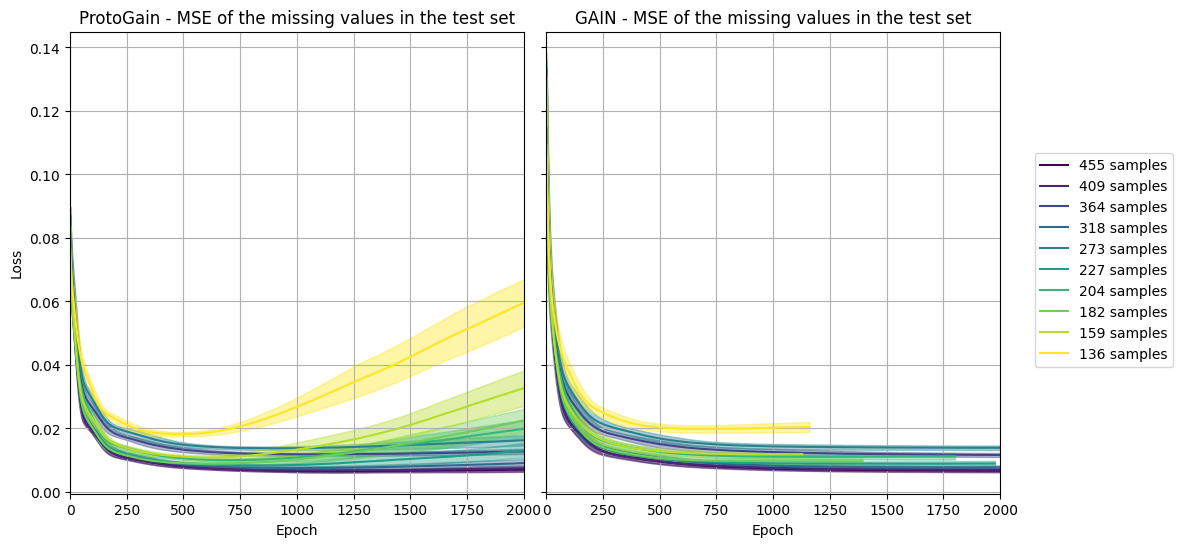

In [106]:
# Plot the MSE missing values test samples
xmax = params.num_epochs

# Create a new figure for Loss D and Loss G
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Set the labels and limits for Loss D
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_xlim(0, xmax)
ax1.set_title(f"ProtoGain - MSE of the missing values in the test set")
ax1.xaxis.grid(True, which="major")
ax1.yaxis.grid(True, which="major")

# Set the labels and limits for Loss G
ax2.set_xlabel("Epoch")
ax2.set_xlim(0, xmax)
ax2.set_title(f"GAIN - MSE of the missing values in the test set")
ax2.xaxis.grid(True, which="major")
ax2.yaxis.grid(True, which="major")

# Create a color gradient based on the loop index
colors = np.linspace(0, 1, len(train_samples))

for i, samples in enumerate(train_samples):

    runs_MSE_test_testsplit = {
        run: data
        for (s, run), data in my_loss_MSE_test_testsplit.items()
        if s == samples
    }
    runs_MSE_test_testsplit_array = np.array(list(runs_MSE_test_testsplit.values()))
    mean_runs_MSE_test_testsplit = np.mean(runs_MSE_test_testsplit_array, axis=0)
    std_runs_MSE_test_testsplit = np.std(runs_MSE_test_testsplit_array, axis=0)

    ax1.plot(
        mean_runs_MSE_test_testsplit,
        label=f"{samples} samples",
        c=plt.cm.viridis(colors[i]),
    )
    ax1.fill_between(
        np.arange(1, len(mean_runs_MSE_test_testsplit) + 1, 1),
        mean_runs_MSE_test_testsplit[:, 0] + std_runs_MSE_test_testsplit[:, 0],
        mean_runs_MSE_test_testsplit[:, 0] - std_runs_MSE_test_testsplit[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )

    runs_MSE_test_testsplit = {
        run: data
        for (s, run), data in gain_loss_MSE_test_testsplit.items()
        if s == samples
    }
    runs_MSE_test_testsplit_array = np.array(list(runs_MSE_test_testsplit.values()))
    mean_runs_MSE_test_testsplit = np.mean(runs_MSE_test_testsplit_array, axis=0)
    std_runs_MSE_test_testsplit = np.std(runs_MSE_test_testsplit_array, axis=0)

    ax2.plot(
        mean_runs_MSE_test_testsplit,
        c=plt.cm.viridis(colors[i]),
    )
    ax2.fill_between(
        np.arange(1, len(mean_runs_MSE_test_testsplit) + 1, 1),
        mean_runs_MSE_test_testsplit[:, 0] + std_runs_MSE_test_testsplit[:, 0],
        mean_runs_MSE_test_testsplit[:, 0] - std_runs_MSE_test_testsplit[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )


# Add legend to both subplots
fig.legend(loc="center right", bbox_to_anchor=(1.05, 0.5))

plt.subplots_adjust(wspace=0.05)

# Show the plot
plt.show()

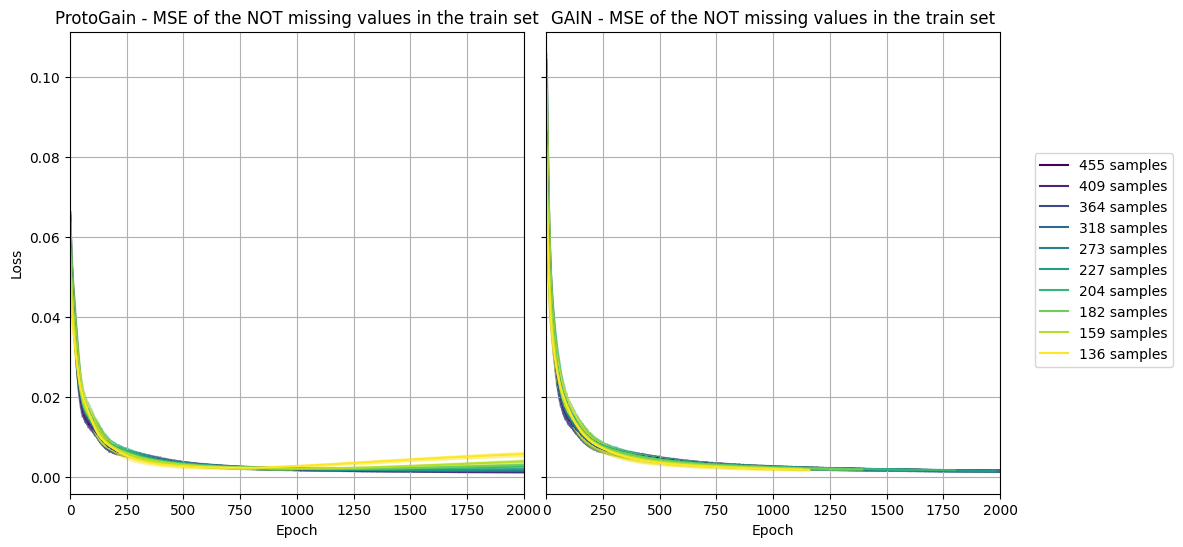

In [107]:
# Plot the MSE NOT missing values train samples

xmax = params.num_epochs

# Create a new figure for Loss D and Loss G
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Set the labels and limits for Loss D
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_xlim(0, xmax)
ax1.set_title(f"ProtoGain - MSE of the NOT missing values in the train set")
ax1.xaxis.grid(True, which="major")
ax1.yaxis.grid(True, which="major")

# Set the labels and limits for Loss G
ax2.set_xlabel("Epoch")
ax2.set_xlim(0, xmax)
ax2.set_title(f"GAIN - MSE of the NOT missing values in the train set")
ax2.xaxis.grid(True, which="major")
ax2.yaxis.grid(True, which="major")

# Create a color gradient based on the loop index
colors = np.linspace(0, 1, len(train_samples))

for i, samples in enumerate(train_samples):

    runs = {run: data for (s, run), data in my_loss_MSE_train.items() if s == samples}
    runs_array = np.array(list(runs.values()))
    mean_runs = np.mean(runs_array, axis=0)
    std_runs = np.std(runs_array, axis=0)

    ax1.plot(mean_runs, label=f"{samples} samples", c=plt.cm.viridis(colors[i]))
    ax1.fill_between(
        np.arange(1, len(mean_runs) + 1, 1),
        mean_runs[:, 0] + std_runs[:, 0],
        mean_runs[:, 0] - std_runs[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )

    runs = {run: data for (s, run), data in gain_loss_MSE_train.items() if s == samples}
    runs_array = np.array(list(runs.values()))
    mean_runs = np.mean(runs_array, axis=0)
    std_runs = np.std(runs_array, axis=0)

    ax2.plot(mean_runs, c=plt.cm.viridis(colors[i]))
    ax2.fill_between(
        np.arange(1, len(mean_runs) + 1, 1),
        mean_runs[:, 0] + std_runs[:, 0],
        mean_runs[:, 0] - std_runs[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )


fig.legend(loc="center right", bbox_to_anchor=(1.05, 0.5))

plt.subplots_adjust(wspace=0.05)

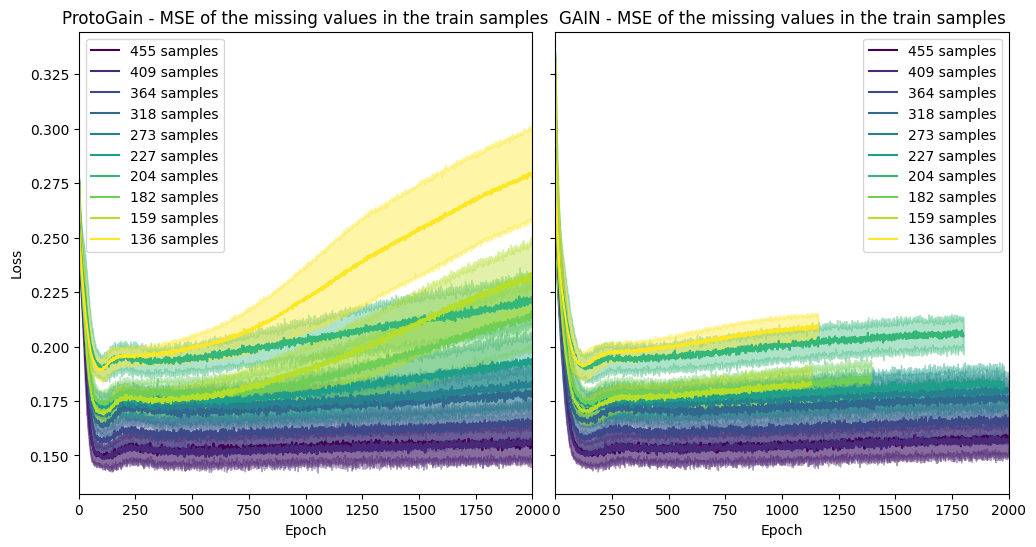

In [108]:
# Plot the MSE missing values train samples (the one that doesn't make sense)
xmax = params.num_epochs


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_xlim(0, xmax)
ax1.set_title(f"ProtoGain - MSE of the missing values in the train samples")


ax2.set_xlabel("Epoch")
ax2.set_xlim(0, xmax)
ax2.set_title(f"GAIN - MSE of the missing values in the train samples")

# Create a color gradient based on the loop index
colors = np.linspace(0, 1, len(train_samples))

for i, samples in enumerate(train_samples):

    runs = {run: data for (s, run), data in my_loss_MSE_test.items() if s == samples}
    runs_array = np.array(list(runs.values()))
    mean_runs = np.mean(runs_array, axis=0)
    std_runs = np.std(runs_array, axis=0)

    ax1.plot(mean_runs, label=f"{samples} samples", c=plt.cm.viridis(colors[i]))
    ax1.fill_between(
        np.arange(1, len(mean_runs) + 1, 1),
        mean_runs[:, 0] + std_runs[:, 0],
        mean_runs[:, 0] - std_runs[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )

    runs = {run: data for (s, run), data in gain_loss_MSE_test.items() if s == samples}
    runs_array = np.array(list(runs.values()))
    mean_runs = np.mean(runs_array, axis=0)
    std_runs = np.std(runs_array, axis=0)

    ax2.plot(mean_runs, label=f"{samples} samples", c=plt.cm.viridis(colors[i]))
    ax2.fill_between(
        np.arange(1, len(mean_runs) + 1, 1),
        mean_runs[:, 0] + std_runs[:, 0],
        mean_runs[:, 0] - std_runs[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )


# Add legend to both subplots
ax1.legend()
ax2.legend()

plt.subplots_adjust(wspace=0.05)

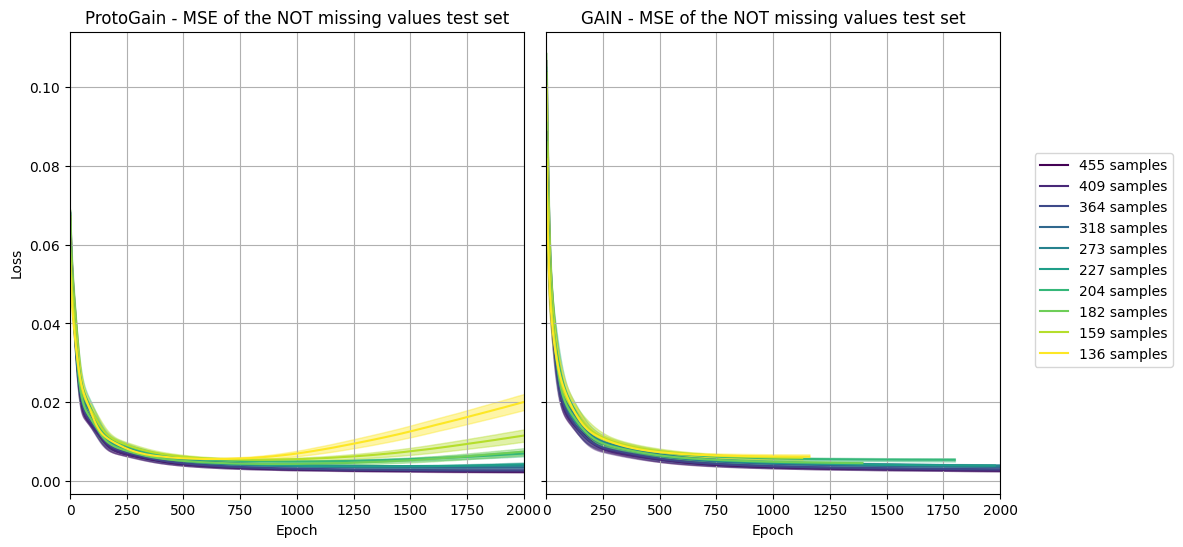

In [109]:
# Plot the MSE NOT missing values test samples
xmax = params.num_epochs


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_xlim(0, xmax)
ax1.set_title(f"ProtoGain - MSE of the NOT missing values test set")
ax1.xaxis.grid(True, which="major")
ax1.yaxis.grid(True, which="major")


ax2.set_xlabel("Epoch")
ax2.set_xlim(0, xmax)
ax2.set_title(f"GAIN - MSE of the NOT missing values test set")
ax2.xaxis.grid(True, which="major")
ax2.yaxis.grid(True, which="major")

# Create a color gradient based on the loop index
colors = np.linspace(0, 1, len(train_samples))

for i, samples in enumerate(train_samples):

    runs = {
        run: data
        for (s, run), data in my_loss_MSE_train_testsplit.items()
        if s == samples
    }
    runs_array = np.array(list(runs.values()))
    mean_runs = np.mean(runs_array, axis=0)
    std_runs = np.std(runs_array, axis=0)

    ax1.plot(mean_runs, label=f"{samples} samples", c=plt.cm.viridis(colors[i]))
    ax1.fill_between(
        np.arange(1, len(mean_runs) + 1, 1),
        mean_runs[:, 0] + std_runs[:, 0],
        mean_runs[:, 0] - std_runs[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )

    runs = {
        run: data
        for (s, run), data in gain_loss_MSE_train_testsplit.items()
        if s == samples
    }
    runs_array = np.array(list(runs.values()))
    mean_runs = np.mean(runs_array, axis=0)
    std_runs = np.std(runs_array, axis=0)

    ax2.plot(mean_runs, c=plt.cm.viridis(colors[i]))
    ax2.fill_between(
        np.arange(1, len(mean_runs) + 1, 1),
        mean_runs[:, 0] + std_runs[:, 0],
        mean_runs[:, 0] - std_runs[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )


fig.legend(loc="center right", bbox_to_anchor=(1.05, 0.5))

plt.subplots_adjust(wspace=0.05)

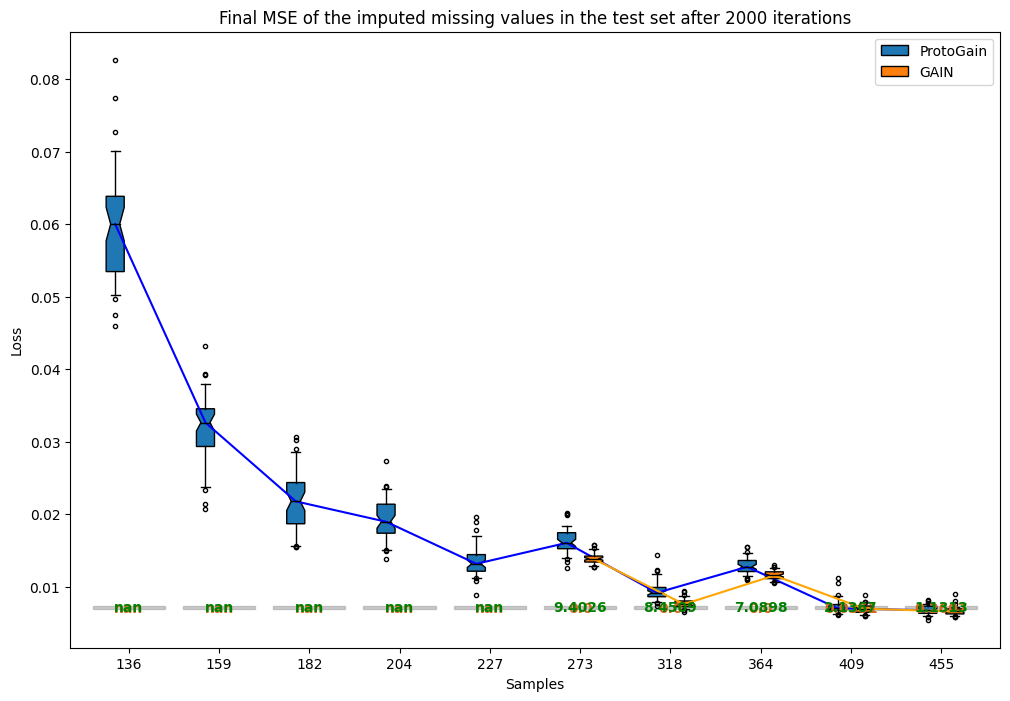

In [4]:
# Final MSE

my_mse_values = {}
gain_mse_values = {}

for samples in train_samples:
    for run in range(params.num_runs):
        my_mse_values[samples] = my_mse_values.get(samples, []) + [
            my_MSE_final[samples, run]
        ]

    my_mse_values[samples] = np.concatenate(my_mse_values[samples])

my_mse_values = dict(reversed(list(my_mse_values.items())))
nb_groups = len(my_mse_values)
space = 0.15
fig, ax = plt.subplots(figsize=(12, 8))

box_param = dict(
    whis=(5, 95),
    widths=0.2,
    patch_artist=True,
    flierprops=dict(marker=".", markeredgecolor="black", fillstyle=None),
    notch=True,
    medianprops=dict(color="black"),
)


bp1 = ax.boxplot(
    my_mse_values.values(),
    positions=np.arange(nb_groups) - space,
    boxprops=dict(facecolor="tab:blue"),
    **box_param,
)

X = []
Y = []
for m in bp1["medians"]:
    [[x0, x1], [y0, y1]] = m.get_data()
    X.append(np.mean((x0, x1)))
    Y.append(np.mean((y0, y1)))
ax.plot(X, Y, c="blue")


################################# GAIN ############################################
for samples in train_samples:
    for run in range(params.num_runs):
        gain_mse_values[samples] = gain_mse_values.get(samples, []) + [
            gain_MSE_final[samples, run]
        ]

    gain_mse_values[samples] = np.concatenate(gain_mse_values[samples])

gain_mse_values = dict(reversed(list(gain_mse_values.items())))

# ax[1] = ax1.twinx()
bp2 = ax.boxplot(
    gain_mse_values.values(),
    positions=np.arange(nb_groups) + space,
    boxprops=dict(facecolor="tab:orange"),
    **box_param,
)
# ax.set_xticklabels(mse_values.keys())

X = []
Y = []
for m in bp2["medians"]:
    [[x0, x1], [y0, y1]] = m.get_data()
    X.append(np.mean((x0, x1)))
    Y.append(np.mean((y0, y1)))
ax.plot(X, Y, c="orange")


ax.set_xlabel("Samples")
ax.set_ylabel("Loss")
ax.set_title(
    f"Final MSE of the imputed missing values in the test set after {params.num_epochs} iterations"
)
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ["ProtoGain", "GAIN"], loc="upper right")
# ax.set_ylim(0.0065, 0.02)

ax.set_xticks(np.arange(nb_groups))
ax.set_xticklabels([f"{key}" for key in gain_mse_values.keys()])

for tick, samples in enumerate(gain_mse_values.keys()):
    res = ttest_ind(my_mse_values[samples], gain_mse_values[samples])
    x = tick
    y = 0.007

    # Draw the square
    ax.add_patch(
        plt.Rectangle((x - 0.4, y - 0.00008), 0.8, 0.0005, color="grey", alpha=0.4)
    )

    # Add the res value inside the square
    ax.text(
        x,
        y,
        str(round(res.pvalue, 4)),
        color="chocolate",
        ha="center",
        va="center",
        weight="bold",
    )
    ax.text(
        x,
        y + 0.00025,
        str(round(res.statistic, 4)),
        color="g",
        ha="center",
        va="center",
        weight="bold",
    )

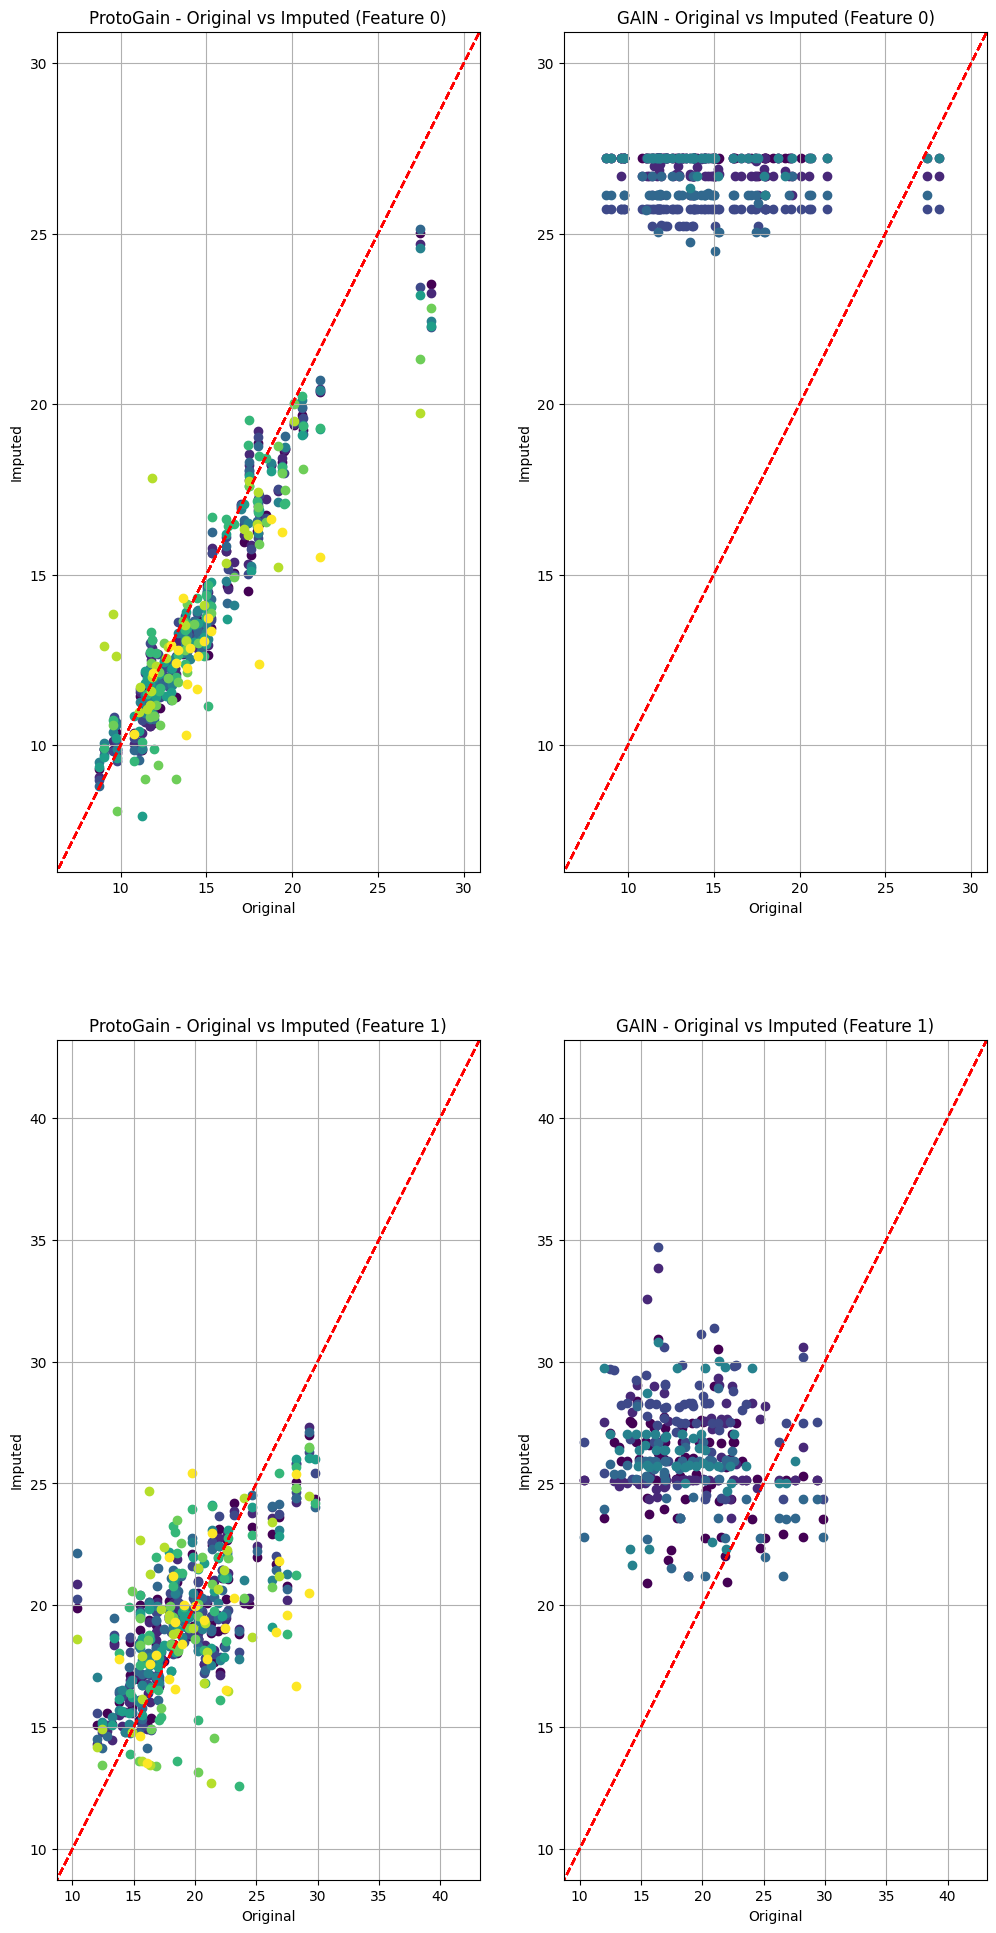

In [111]:
# Original VS Imputed

xlim = 100000


x = np.linspace(-xlim, xlim, 100)
y = x

df = pd.read_csv(f"{myFolder}{dataset}.csv")
features = np.arange(len(df.columns))

features = np.array([0, 1])

fig, axs = plt.subplots(len(features), 2, figsize=(12, 12 * 2))

for feature in features:

    df_data = {}
    df_missing = {}
    df_imputed = {}
    zeros = {}
    runs_imputed = {}
    mean_runs_imputed = {}
    std_runs_imputed = {}

    colors = np.linspace(0, 1, len(train_samples))

    for samples in train_samples:
        df_data[samples] = np.array(
            pd.read_csv(
                f"{myFolder}{dataset}_{int(params.miss_rate * 100)}_{samples}.csv"
            )
        )

        df_missing[samples] = np.array(
            pd.read_csv(
                f"{myFolder}{dataset}Missing_{int(params.miss_rate * 100)}_{samples}.csv"
            )
        )

        zeros[samples] = np.where(np.isnan(df_missing[samples]))

        for run in range(params.num_runs):
            df_imputed[samples, run] = np.array(
                pd.read_csv(
                    f"{myFolder}/results/{dataset}Imputed_{int(params.miss_rate * 100)}_{samples}_{run}.csv"
                )
            )

        runs_imputed[samples] = {
            run: data for (s, run), data in df_imputed.items() if s == samples
        }
        mean_runs_imputed[samples] = np.mean(
            list(runs_imputed[samples].values()), axis=0
        )
        std_runs_imputed[samples] = np.std(list(runs_imputed[samples].values()), axis=0)

    xmin = df.iloc[:, feature].min()
    xmax = df.iloc[:, feature].max()

    zeros_0 = {}
    for samples, zeros_indices in zeros.items():
        for i in range(len(zeros_indices[0])):
            if zeros_indices[1][i] == feature:
                zeros_0[samples] = zeros_0.get(samples, []) + [zeros_indices[0][i]]

    for i, samples in enumerate(train_samples):

        ymin = mean_runs_imputed[samples].min()
        ymax = mean_runs_imputed[samples].max()

        # print(mean_runs_imputed[samples], ymin, ymax)
        # mean_runs_imputed[samples] = mean_runs_imputed[samples].astype(int)
        axs[feature, 0].plot(x, y, color="red", linestyle="--")
        axs[feature, 0].scatter(
            df_data[samples][zeros_0[samples], feature],
            mean_runs_imputed[samples][zeros_0[samples], feature],
            color=plt.cm.viridis(colors[i]),
        )
        axs[feature, 0].set_xlabel("Original")
        axs[feature, 0].set_ylabel("Imputed")
        axs[feature, 0].set_xlim(xmin * 0.9, xmax * 1.1)
        axs[feature, 0].set_ylim(xmin * 0.9, xmax * 1.1)
        axs[feature, 0].set_title(
            f"ProtoGain - Original vs Imputed (Feature {feature})"
        )
        axs[feature, 0].xaxis.grid(True, which="major")
        axs[feature, 0].yaxis.grid(True, which="major")

    #########################################  GAIN  #####################################################
    df_data = {}
    df_missing = {}
    df_imputed = {}
    zeros = {}
    runs_imputed = {}
    mean_runs_imputed = {}
    std_runs_imputed = {}

    for samples in train_samples:
        df_data[samples] = np.array(
            pd.read_csv(
                f"{gainFolder}{dataset}_{int(params.miss_rate * 100)}_{samples}.csv"
            )
        )

        df_missing[samples] = np.array(
            pd.read_csv(
                f"{gainFolder}{dataset}Missing_{int(params.miss_rate * 100)}_{samples}.csv"
            )
        )

        zeros[samples] = np.where(np.isnan(df_missing[samples]))

        for run in range(params.num_runs):
            df_imputed[samples, run] = np.array(
                pd.read_csv(
                    f"{gainFolder}results/{dataset}Imputed_{int(params.miss_rate * 100)}_{samples}_{run}.csv"
                )
            )

        runs_imputed[samples] = {
            run: data for (s, run), data in df_imputed.items() if s == samples
        }
        mean_runs_imputed[samples] = np.mean(
            list(runs_imputed[samples].values()), axis=0
        )
        std_runs_imputed[samples] = np.std(list(runs_imputed[samples].values()), axis=0)

    zeros_0 = {}
    for samples, zeros_indices in zeros.items():
        for i in range(len(zeros_indices[0])):
            if zeros_indices[1][i] == feature:
                zeros_0[samples] = zeros_0.get(samples, []) + [zeros_indices[0][i]]

    for i, samples in enumerate(train_samples):
        # mean_runs_imputed[samples] = mean_runs_imputed[samples].astype(int)

        ymin = mean_runs_imputed[samples].min()
        ymax = mean_runs_imputed[samples].max()

        axs[feature, 1].plot(x, y, color="red", linestyle="--")
        axs[feature, 1].scatter(
            df_data[samples][zeros_0[samples], feature],
            mean_runs_imputed[samples][zeros_0[samples], feature],
            color=plt.cm.viridis(colors[i]),
        )
        axs[feature, 1].set_xlabel("Original")
        axs[feature, 1].set_ylabel("Imputed")
        axs[feature, 1].set_xlim(xmin * 0.9, xmax * 1.1)
        axs[feature, 1].set_ylim(xmin * 0.9, xmax * 1.1)
        axs[feature, 1].set_title(f"GAIN - Original vs Imputed (Feature {feature})")
        axs[feature, 1].xaxis.grid(True, which="major")
        axs[feature, 1].yaxis.grid(True, which="major")

# fig.legend(loc="center right", bbox_to_anchor=(1.05, 0.5))

{136: array([21.90901446]), 159: array([21.72008538]), 182: array([21.77039385]), 204: array([21.72099066]), 227: array([21.77748132]), 273: array([23.23755765]), 318: array([21.71945667]), 364: array([21.93270826]), 409: array([21.96347022]), 455: array([21.9631598])}


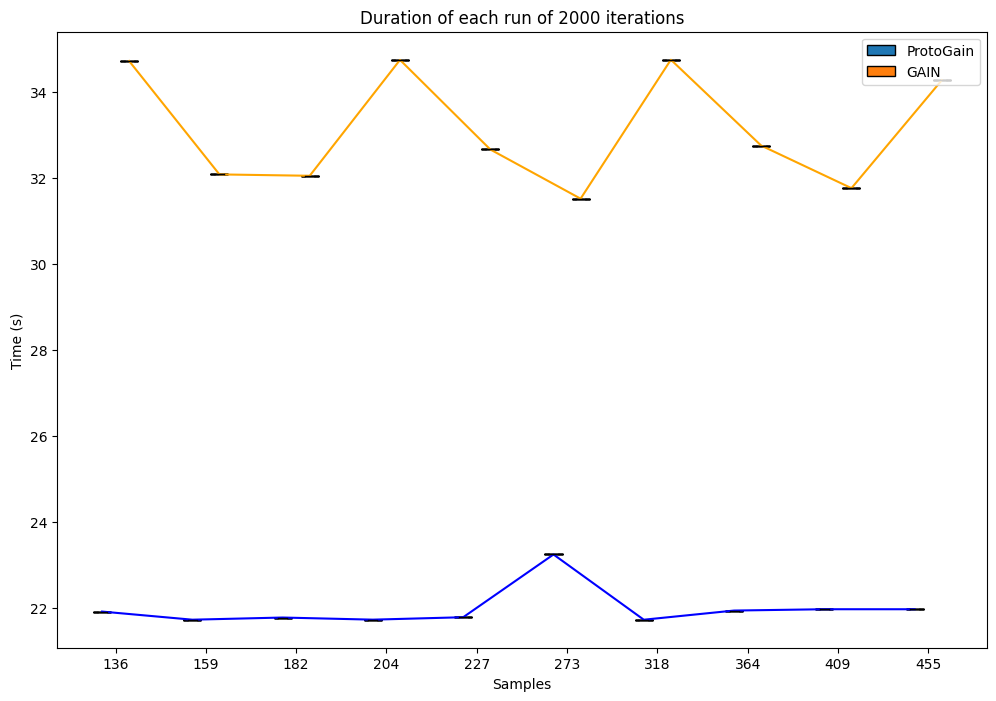

In [6]:
# Boxplot of the time of each run

my_time_values = {}
gain_time_values = {}


my_time_values = dict(reversed(list(my_run_time.items())))
nb_groups = len(my_time_values)
space = 0.15
fig, ax = plt.subplots(figsize=(12, 8))

box_param = dict(
    whis=(5, 95),
    widths=0.2,
    patch_artist=True,
    flierprops=dict(marker=".", markeredgecolor="black", fillstyle=None),
    notch=True,
    medianprops=dict(color="black"),
)


bp1 = ax.boxplot(
    my_time_values.values(),
    positions=np.arange(nb_groups) - space,
    boxprops=dict(facecolor="tab:blue"),
    **box_param,
)

X = []
Y = []
for m in bp1["medians"]:
    [[x0, x1], [y0, y1]] = m.get_data()
    X.append(np.mean((x0, x1)))
    Y.append(np.mean((y0, y1)))
ax.plot(X, Y, c="blue")


################################# GAIN ############################################

gain_time_values = dict(reversed(list(gain_run_time.items())))

# ax[1] = ax1.twinx()
bp2 = ax.boxplot(
    gain_time_values.values(),
    positions=np.arange(nb_groups) + space,
    boxprops=dict(facecolor="tab:orange"),
    **box_param,
)
# ax.set_xticklabels(mse_values.keys())

X = []
Y = []
for m in bp2["medians"]:
    [[x0, x1], [y0, y1]] = m.get_data()
    X.append(np.mean((x0, x1)))
    Y.append(np.mean((y0, y1)))
ax.plot(X, Y, c="orange")


ax.set_xlabel("Samples")
ax.set_ylabel("Time (s)")
ax.set_title(f"Duration of each run of {params.num_epochs} iterations")
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ["ProtoGain", "GAIN"], loc="upper right")

ax.set_xticks(np.arange(nb_groups))
ax.set_xticklabels([f"{key}" for key in gain_mse_values.keys()])


# mean_run_time = np.zeros(len(train_samples))
# std_run_time = np.zeros(len(train_samples))

# fig = plt.figure()

# plt.boxplot(my_run_time.values(), notch=True)
# plt.xlabel("Samples")
# plt.ylabel("Time (s)")
# plt.xticks(range(1, len(my_run_time) + 1), my_run_time.keys())
# plt.title("My Gain - Time of each run My Gain")


# fig1 = plt.figure()

# for i, samples in enumerate(train_samples):
#     mean_run_time[i] = my_run_time[samples].mean()
#     std_run_time[i] = my_run_time[samples].std()

# mean_run_time = mean_run_time[::-1]
# std_run_time = std_run_time[::-1]

# plt.plot(train_samples, mean_run_time, "o-", markersize=7)
# plt.fill_between(
#     np.arange(1, len(mean_run_time) + 1, 1),
#     mean_run_time + std_run_time,
#     mean_run_time - std_run_time,
#     alpha=0.4,
# )
# plt.xlabel("Samples")
# plt.ylabel("Time (s)")
# plt.title("My Gain - Time of each run My Gain")
# plt.legend()

# #########################################################################
# mean_run_time = np.zeros(len(train_samples))
# std_run_time = np.zeros(len(train_samples))

# fig = plt.figure()

# plt.boxplot(gain_run_time.values(), notch=True)
# plt.xlabel("Nº Samples")
# plt.ylabel("Time (s)")
# plt.xticks(range(1, len(gain_run_time) + 1), gain_run_time.keys())
# plt.title("GAIN - Time of each run My Gain")


# fig1 = plt.figure()

# for i, samples in enumerate(train_samples):
#     mean_run_time[i] = gain_run_time[samples].mean()
#     std_run_time[i] = gain_run_time[samples].std()

# mean_run_time = mean_run_time[::-1]
# std_run_time = std_run_time[::-1]

# plt.plot(train_samples, mean_run_time, "o-", markersize=7)
# plt.fill_between(
#     np.arange(1, len(mean_run_time) + 1, 1),
#     mean_run_time + std_run_time,
#     mean_run_time - std_run_time,
#     alpha=0.4,
# )
# plt.xlabel("Samples")
# plt.ylabel("Time (s)")
# plt.title("GAIN - Time of each run My Gain")
# plt.legend()


print(my_time_values)
# for tick, samples in enumerate(gain_mse_values.keys()):
#     res = ttest_ind(my_time_values[samples], gain_time_values[samples])
#     x = tick
#     y = 0.007

#     # Draw the square
#     ax.add_patch(plt.Rectangle((x - 0.4, y-0.00008), 0.8, 0.0005, color="grey", alpha = 0.4))

#     # Add the res value inside the square
#     ax.text(x, y, str(round(res.pvalue,4)), color="chocolate", ha="center", va="center", weight='bold')
#     ax.text(x, y+0.00025, str(round(res.statistic,4)), color="g", ha="center", va="center", weight='bold')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

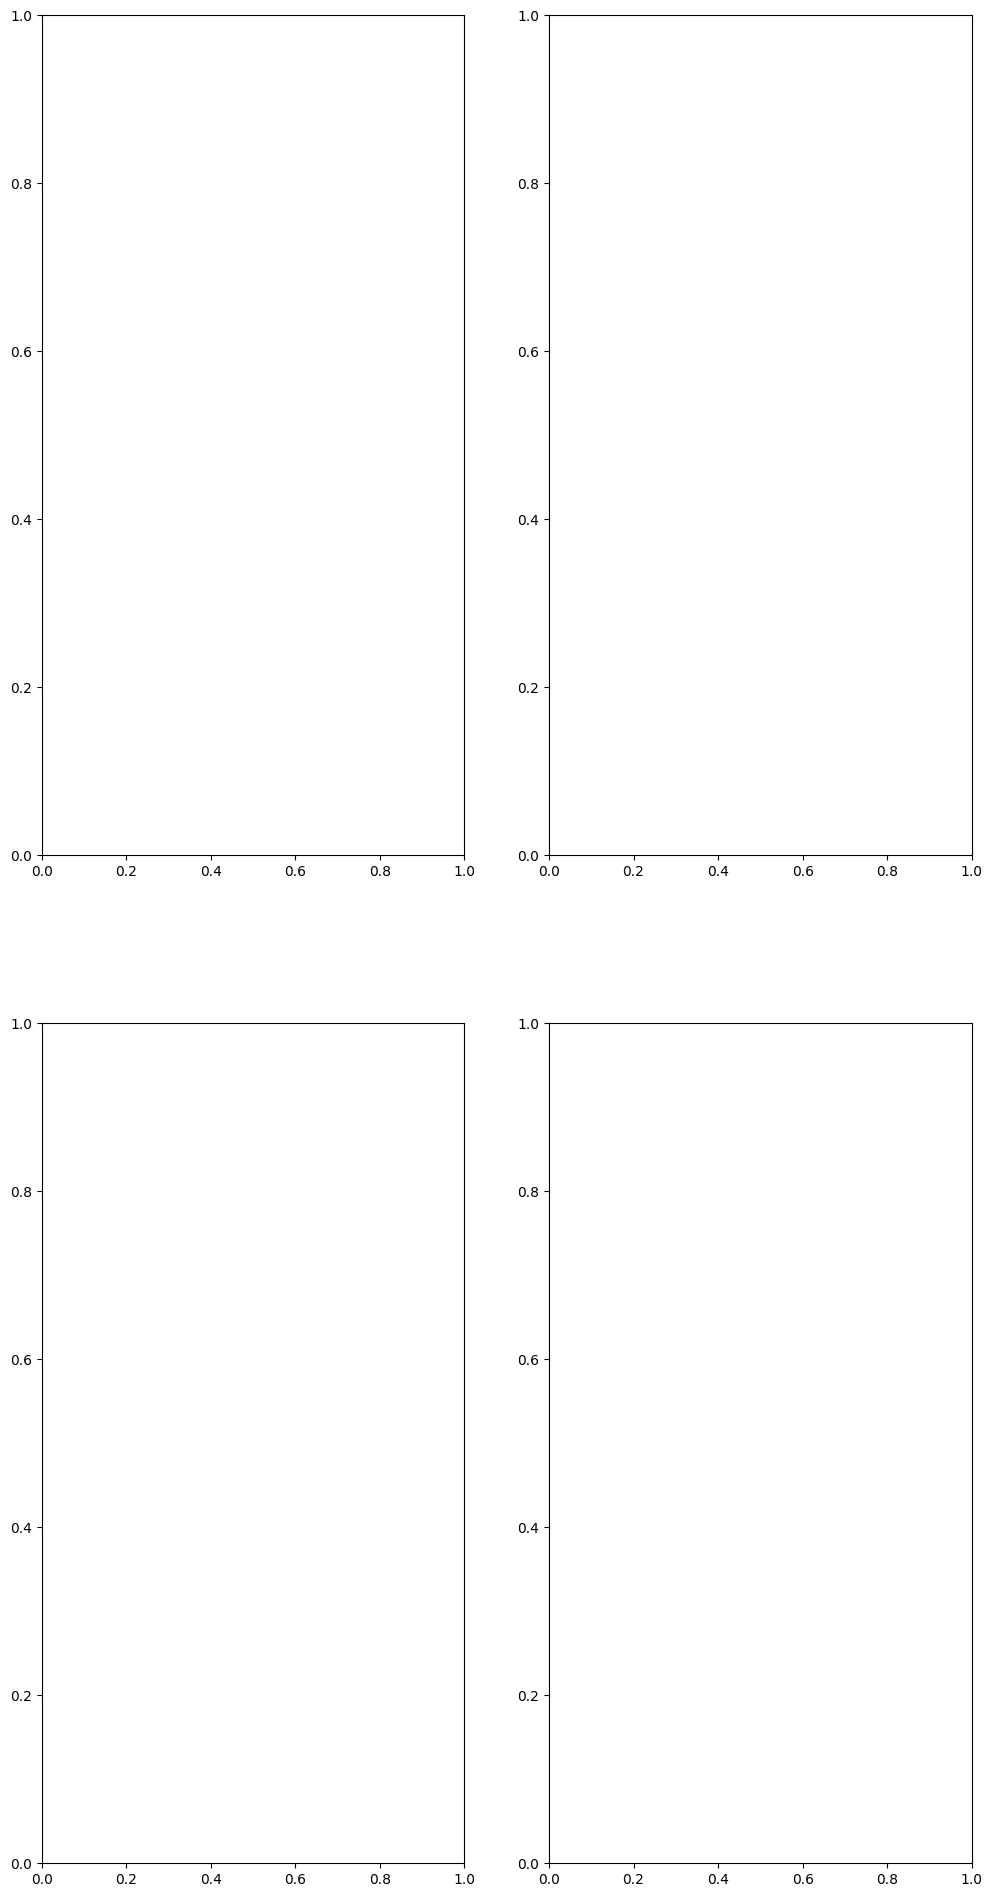

In [80]:
# Original VS Imputed Test Set

xlim = 100000


x = np.linspace(-xlim, xlim, 100)
y = x

df = pd.read_csv(f"{myFolder}{dataset}.csv")
features = np.arange(len(df.columns))

features = np.array([0, 10])

fig, axs = plt.subplots(len(features), 2, figsize=(12, 12 * 2))

for feature in features:

    df_data = {}
    df_missing = {}
    df_imputed = {}
    zeros = {}
    runs_imputed = {}
    mean_runs_imputed = {}
    std_runs_imputed = {}

    colors = np.linspace(0, 1, len(train_samples))

    for samples in train_samples:
        df_data[samples] = np.array(
            pd.read_csv(
                f"{myFolder}{dataset}_test_{int(params.miss_rate * 100)}_{test_samples}.csv"
            )
        )

        df_missing[samples] = np.array(
            pd.read_csv(
                f"{myFolder}{dataset}Missing_test_{int(params.miss_rate * 100)}_{test_samples}.csv"
            )
        )

        zeros[samples] = np.where(np.isnan(df_missing[samples]))

        for run in range(params.num_runs):
            df_imputed[samples, run] = np.array(
                pd.read_csv(
                    f"{myFolder}results/{dataset}Imputed_test_{int(params.miss_rate * 100)}_{samples}_{run}.csv"
                )
            )

        runs_imputed[samples] = {
            run: data for (s, run), data in df_imputed.items() if s == samples
        }
        mean_runs_imputed[samples] = np.mean(
            list(runs_imputed[samples].values()), axis=0
        )
        std_runs_imputed[samples] = np.std(list(runs_imputed[samples].values()), axis=0)

    xmin = df.iloc[:, feature].min()
    xmax = df.iloc[:, feature].max()

    zeros_0 = {}
    for samples, zeros_indices in zeros.items():
        for i in range(len(zeros_indices[0])):
            if zeros_indices[1][i] == feature:
                zeros_0[samples] = zeros_0.get(samples, []) + [zeros_indices[0][i]]

    for i, samples in enumerate(train_samples):

        ymin = mean_runs_imputed[samples].min()
        ymax = mean_runs_imputed[samples].max()

        # print(mean_runs_imputed[samples], ymin, ymax)
        # mean_runs_imputed[samples] = mean_runs_imputed[samples].astype(int)
        axs[feature, 0].plot(x, y, color="red", linestyle="--")
        axs[feature, 0].scatter(
            df_data[samples][zeros_0[samples], feature],
            mean_runs_imputed[samples][zeros_0[samples], feature],
            color=plt.cm.viridis(colors[i]),
        )
        axs[feature, 0].set_xlabel("Original")
        axs[feature, 0].set_ylabel("Imputed")
        axs[feature, 0].set_xlim(xmin * 0.9, xmax * 1.1)
        axs[feature, 0].set_ylim(xmin * 0.9, xmax * 1.1)
        axs[feature, 0].set_title(
            f"ProtoGain - Original vs Imputed (Feature {feature})"
        )
        axs[feature, 0].xaxis.grid(True, which="major")
        axs[feature, 0].yaxis.grid(True, which="major")

    #########################################  GAIN  #####################################################
    df_data = {}
    df_missing = {}
    df_imputed = {}
    zeros = {}
    runs_imputed = {}
    mean_runs_imputed = {}
    std_runs_imputed = {}

    for samples in train_samples:
        df_data[samples] = np.array(
            pd.read_csv(
                f"{gainFolder}{dataset}_test_{int(params.miss_rate * 100)}_{test_samples}.csv"
            )
        )

        df_missing[samples] = np.array(
            pd.read_csv(
                f"{gainFolder}{dataset}Missing_test_{int(params.miss_rate * 100)}_{test_samples}.csv"
            )
        )

        zeros[samples] = np.where(np.isnan(df_missing[samples]))

        for run in range(params.num_runs):
            df_imputed[samples, run] = np.array(
                pd.read_csv(
                    f"{gainFolder}results/{dataset}Imputed_test_{int(params.miss_rate * 100)}_{samples}_{run}.csv"
                )
            )

        runs_imputed[samples] = {
            run: data for (s, run), data in df_imputed.items() if s == samples
        }
        mean_runs_imputed[samples] = np.mean(
            list(runs_imputed[samples].values()), axis=0
        )
        std_runs_imputed[samples] = np.std(list(runs_imputed[samples].values()), axis=0)

    zeros_0 = {}
    for samples, zeros_indices in zeros.items():
        for i in range(len(zeros_indices[0])):
            if zeros_indices[1][i] == feature:
                zeros_0[samples] = zeros_0.get(samples, []) + [zeros_indices[0][i]]

    for i, samples in enumerate(train_samples):
        # mean_runs_imputed[samples] = mean_runs_imputed[samples].astype(int)

        ymin = mean_runs_imputed[samples].min()
        ymax = mean_runs_imputed[samples].max()

        axs[feature, 1].plot(x, y, color="red", linestyle="--")
        axs[feature, 1].scatter(
            df_data[samples][zeros_0[samples], feature],
            mean_runs_imputed[samples][zeros_0[samples], feature],
            color=plt.cm.viridis(colors[i]),
        )
        axs[feature, 1].set_xlabel("Original")
        axs[feature, 1].set_ylabel("Imputed")
        axs[feature, 1].set_xlim(xmin * 0.9, xmax * 1.1)
        axs[feature, 1].set_ylim(xmin * 0.9, xmax * 1.1)
        axs[feature, 1].set_title(f"GAIN - Original vs Imputed (Feature {feature})")
        axs[feature, 1].xaxis.grid(True, which="major")
        axs[feature, 1].yaxis.grid(True, which="major")

# fig.legend(loc="center right", bbox_to_anchor=(1.05, 0.5))

ValueError: x and y must have same first dimension, but have shapes (20,) and (30, 1)

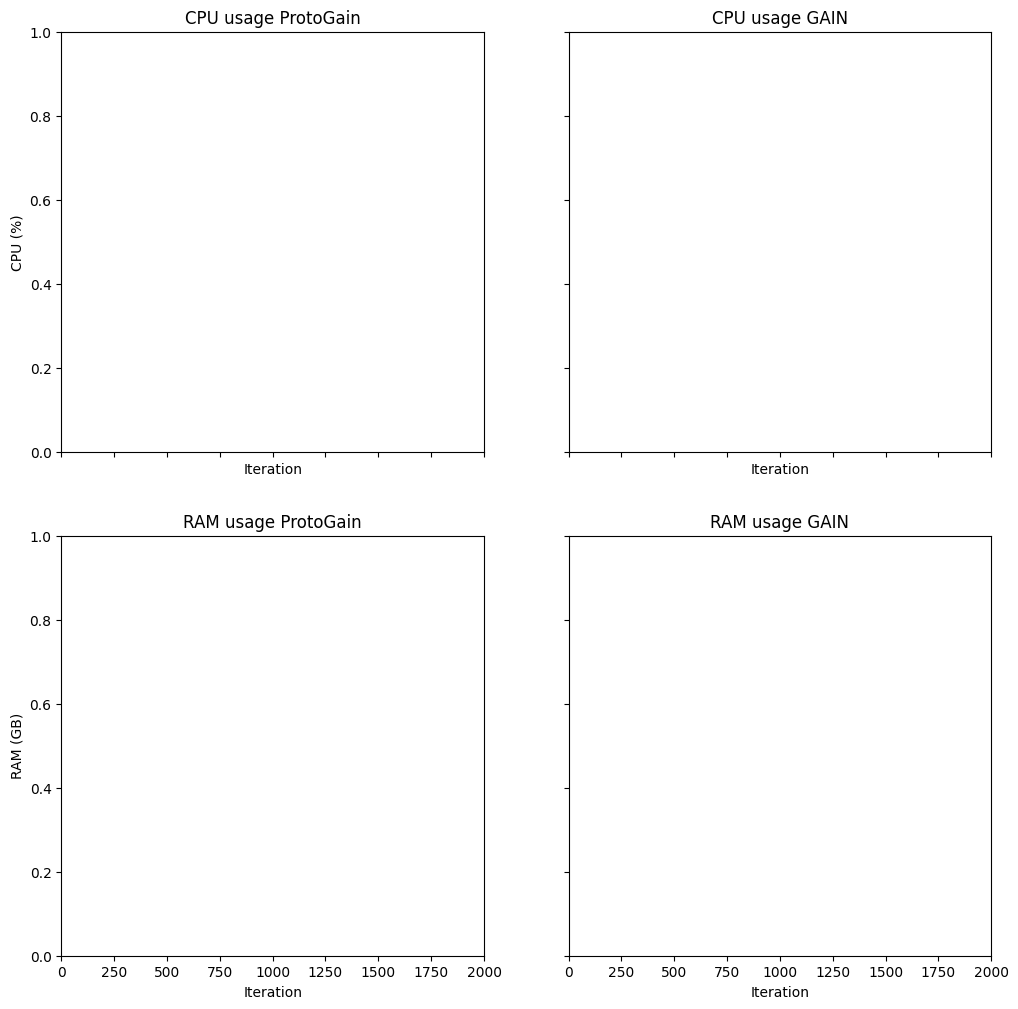

In [113]:
# CPU and RAM

xmax = params.num_epochs

fig, axs = plt.subplots(2, 2, figsize=(12, 12), sharex=True, sharey="row")

# Set the labels and limits for Loss D
axs[0, 0].set_xlabel("Iteration")
axs[0, 0].set_ylabel("CPU (%)")
axs[0, 0].set_xlim(0, xmax)
axs[0, 0].set_title(f"CPU usage ProtoGain")

# Set the labels and limits for Loss G
axs[0, 1].set_xlabel("Iteration")
axs[0, 1].set_title(f"CPU usage GAIN")


axs[1, 0].set_xlabel("Iteration")
axs[1, 0].set_ylabel("RAM (GB)")
axs[1, 0].set_title(f"RAM usage ProtoGain")
axs[1, 1].set_xlabel("Iteration")
axs[1, 1].set_title(f"RAM usage GAIN")


x_ticks = range(0, xmax, 100)


# Create a color gradient based on the loop index
colors = np.linspace(0, 1, len(train_samples))

for i, samples in enumerate(train_samples):
    runs_cpu = {run: data for (s, run), data in my_cpu.items() if s == samples}
    runs_cpu_array = np.array(list(runs_cpu.values()))
    mean_runs_cpu = np.mean(runs_cpu_array, axis=0)
    std_runs_cpu = np.std(runs_cpu_array, axis=0)

    # Use the color gradient for the plot
    axs[0, 0].plot(
        x_ticks, mean_runs_cpu, label=f"{samples} samples", c=plt.cm.viridis(colors[i])
    )
    axs[0, 0].fill_between(
        np.arange(1, len(mean_runs_cpu) + 1, 1),
        mean_runs_cpu[:, 0] + std_runs_cpu[:, 0],
        mean_runs_cpu[:, 0] - std_runs_cpu[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )
    axs[0, 0].xaxis.grid(True, which="major")
    axs[0, 0].yaxis.grid(True, which="major")

    runs_cpu = {run: data for (s, run), data in gain_cpu.items() if s == samples}
    runs_cpu_array = np.array(list(runs_cpu.values()))
    mean_runs_cpu = np.mean(runs_cpu_array, axis=0)
    std_runs_cpu = np.std(runs_cpu_array, axis=0)

    # Use the color gradient for the plot

    axs[0, 1].plot(x_ticks, mean_runs_cpu, c=plt.cm.viridis(colors[i]))
    axs[0, 1].fill_between(
        np.arange(1, len(mean_runs_cpu) + 1, 1),
        mean_runs_cpu[:, 0] + std_runs_cpu[:, 0],
        mean_runs_cpu[:, 0] - std_runs_cpu[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )
    axs[0, 1].xaxis.grid(True, which="major")
    axs[0, 1].yaxis.grid(True, which="major")

    runs_ram = {run: data for (s, run), data in my_ram.items() if s == samples}
    runs_ram_array = np.array(list(runs_ram.values()))
    mean_runs_ram = np.mean(runs_ram_array, axis=0)
    std_runs_ram = np.std(runs_ram_array, axis=0)

    axs[1, 0].plot(x_ticks, mean_runs_ram, c=plt.cm.viridis(colors[i]))
    axs[1, 0].fill_between(
        np.arange(1, len(mean_runs_ram) + 1, 1),
        mean_runs_ram[:, 0] + std_runs_ram[:, 0],
        mean_runs_ram[:, 0] - std_runs_ram[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )
    axs[1, 0].xaxis.grid(True, which="major")
    axs[1, 0].yaxis.grid(True, which="major")

    runs_ram = {run: data for (s, run), data in gain_ram.items() if s == samples}
    runs_ram_array = np.array(list(runs_ram.values()))
    mean_runs_ram = np.mean(runs_ram_array, axis=0)
    std_runs_ram = np.std(runs_ram_array, axis=0)

    axs[1, 1].plot(x_ticks, mean_runs_ram, c=plt.cm.viridis(colors[i]))
    axs[1, 1].fill_between(
        np.arange(1, len(mean_runs_ram) + 1, 1),
        mean_runs_ram[:, 0] + std_runs_ram[:, 0],
        mean_runs_ram[:, 0] - std_runs_ram[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )
    axs[1, 1].xaxis.grid(True, which="major")
    axs[1, 1].yaxis.grid(True, which="major")


fig.legend(loc="center right", bbox_to_anchor=(1.05, 0.5))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.05, hspace=0.2)

# Show the plot
plt.show()

In [6]:
# Original VS Imputed Test Set

xlim = 100000

df = pd.read_csv(f"{myFolder}{dataset}.csv")
features = np.arange(len(df.columns))

features = np.array([0])

train_samples = [24000]


for feature in features:

    df_data = {}
    df_missing = {}
    df_imputed = {}
    zeros = {}
    runs_imputed = {}
    mean_runs_imputed = {}
    std_runs_imputed = {}

    colors = np.linspace(0, 1, len(train_samples))

    for samples in train_samples:
        df_data[samples] = np.array(
            pd.read_csv(
                f"{myFolder}{dataset}_test_{int(params.miss_rate * 100)}_{test_samples}.csv"
            )
        )

        df_missing[samples] = np.array(
            pd.read_csv(
                f"{myFolder}{dataset}Missing_test_{int(params.miss_rate * 100)}_{test_samples}.csv"
            )
        )

        zeros[samples] = np.where(np.isnan(df_missing[samples]))

        for run in range(params.num_runs):
            df_imputed[samples, run] = np.array(
                pd.read_csv(
                    f"{myFolder}results/{dataset}Imputed_test_{int(params.miss_rate * 100)}_{samples}_{run}.csv"
                )
            )

        runs_imputed[samples] = {
            run: data for (s, run), data in df_imputed.items() if s == samples
        }
        mean_runs_imputed[samples] = np.mean(
            list(runs_imputed[samples].values()), axis=0
        )
        std_runs_imputed[samples] = np.std(list(runs_imputed[samples].values()), axis=0)

    xmin = df.iloc[:, feature].min()
    xmax = df.iloc[:, feature].max()

    zeros_0 = {}
    for samples, zeros_indices in zeros.items():
        for i in range(len(zeros_indices[0])):
            if zeros_indices[1][i] == feature:
                zeros_0[samples] = zeros_0.get(samples, []) + [zeros_indices[0][i]]

    print(np.corrcoef(df_data[samples], mean_runs_imputed[samples]))

    #########################################  GAIN  #####################################################
    df_data = {}
    df_missing = {}
    df_imputed = {}
    zeros = {}
    runs_imputed = {}
    mean_runs_imputed = {}
    std_runs_imputed = {}

    for samples in train_samples:
        df_data[samples] = np.array(
            pd.read_csv(
                f"{gainFolder}{dataset}_test_{int(params.miss_rate * 100)}_{test_samples}.csv"
            )
        )

        df_missing[samples] = np.array(
            pd.read_csv(
                f"{gainFolder}{dataset}Missing_test_{int(params.miss_rate * 100)}_{test_samples}.csv"
            )
        )

        zeros[samples] = np.where(np.isnan(df_missing[samples]))

        for run in range(params.num_runs):
            df_imputed[samples, run] = np.array(
                pd.read_csv(
                    f"{gainFolder}results/{dataset}Imputed_test_{int(params.miss_rate * 100)}_{samples}_{run}.csv"
                )
            )

        runs_imputed[samples] = {
            run: data for (s, run), data in df_imputed.items() if s == samples
        }
        mean_runs_imputed[samples] = np.mean(
            list(runs_imputed[samples].values()), axis=0
        )
        std_runs_imputed[samples] = np.std(list(runs_imputed[samples].values()), axis=0)

    zeros_0 = {}
    for samples, zeros_indices in zeros.items():
        for i in range(len(zeros_indices[0])):
            if zeros_indices[1][i] == feature:
                zeros_0[samples] = zeros_0.get(samples, []) + [zeros_indices[0][i]]


# fig.legend(loc="center right", bbox_to_anchor=(1.05, 0.5))

[[1.         0.98310741 0.49594661 ... 0.99284177 0.81483381 0.99819876]
 [0.98310741 1.         0.57788078 ... 0.99044012 0.89620527 0.98201718]
 [0.49594661 0.57788078 1.         ... 0.52808034 0.71065581 0.49127448]
 ...
 [0.99284177 0.99044012 0.52808034 ... 1.         0.84700009 0.99395143]
 [0.81483381 0.89620527 0.71065581 ... 0.84700009 1.         0.8163441 ]
 [0.99819876 0.98201718 0.49127448 ... 0.99395143 0.8163441  1.        ]]
